# Eigenpairs

DSTA

# Eigenpairs

## Study materials

I. Goodfellow, Y. Bengio and A. Courville:

[Deep Learning, MIT Press, 2016](https://www.deeplearningbook.org/).

J. Lescovec, A. Rajaraman, J. Ullmann:

[Mining of Massive datasets, MIT Press, 2016](http://www.mmds.org/).

The material covered here is presented in the excerpts available for
download.

# Spectral Analysis

## Eigenpairs

If, given a matrix $A$ we find a real $\lambda$ and a vector **e** s.t.

$$A\mathbf{e} = \lambda \mathbf{e}$$

then $\lambda$ and **e** will be an eigenpair of A.

. . .

In principle, if A has rank n there should be n such pairs.

. . .

In practice, eigenpairs

-   are always *costly* to find.

-   they might have $\lambda=0$: no information, or

-   $\lambda$ might not be a real number: no interpretation.

## Conditions for *good* eigen-

A square matrix *A* is called *positive semidefinite* when for any **x**
we have

$$\mathbf{x}^T A \mathbf{x} \ge 0$$

In such case its eigenvalues are non-negative: $\lambda_i\ge 0$.

## Underlying idea, I

In Geometry, applying a matrix to a vector, $A\mathbf{x}$, creates all
sorts of alteration to the space, e.g,

-   rotation

-   deformation

Eigenvectors, i.e., solutions to $A\mathbf{e} = \lambda \mathbf{e}$

describe the direction along which matrix A operates an **expansion**

## Example: shear mapping

``` python
A = [[1, .27],
     [0,   1]
    ]
```

deforms a vector by increading the first dimension by a quantity
proportional to the value of the second dimension:

$$
\begin{bmatrix}
    x\\
    y
\end{bmatrix}
\longrightarrow 
\begin{bmatrix}
    x + \frac{3}{11}y\\
    y
\end{bmatrix}
$$

<figure>
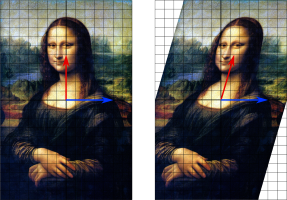
<figcaption aria-hidden="true"><a
href="https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors"></a></figcaption>
</figure>

------------------------------------------------------------------------

<figure>
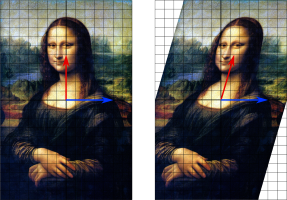
<figcaption aria-hidden="true"><a
href="https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors"></a></figcaption>
</figure>

The blue line is unchanged:

-   an $[x, 0]^T$ eigenvector

-   corresponding to $\lambda=1$

## Activity matrices, I

Under certains conditions:

-the eigenpairs exists,

-e-values are real, non-negative numbers (0 is ok), and

-e-vectors are orthogonal with each other:

. . .

User-activity matrices normally meet those conditions!

## Activity matrices, II

If an activity matrix has *good* eigenpairs,

. . .

each e-vector represents a *direction*

we interpret those directions as *topics* that hidden (latent) within
the data.

e-values *expand* one’s affiliation to a specific *topic*.

# Norms and distances

## Euclidean norm

Pythagora’s theorem, essentially.

$||\mathbf{x}|| = \sqrt{\mathbf{x}^T\mathbf{x}} = \sqrt{\sum_{i=1}^m x_i^2}$

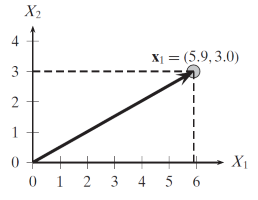

. . .

Generalisation:

$||\mathbf{x}||_p = (|x_1|^p + |x_1|^p + \dots |x_m|^p)^\frac{1}{p} = (\sum_{i=1}^m |x_i|^p)^\frac{1}{p}$

------------------------------------------------------------------------

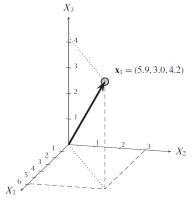

. . .

The Frobenius norm $||\cdot ||_F$ extends $||\cdot ||_2$ to matrices:

$||\mathbf{A}||_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2}$

## Normalization

The *unit* or *normalized* vector of $\mathbf{x}$

$$
\mathbf{u} = \frac{\mathbf{x}}{||\mathbf{x}||} = (\frac{1}{||\mathbf{x}||})\mathbf{x}
$$

-   has the same direction of the original

-   its norm is constructed to be 1.

# Computing Eigenpairs

## With Maths

$$
M\mathbf{e} = \lambda \mathbf{e}
$$

. . .

Handbook solution: solve the equivalent system

$$
(M - \lambda \mathbf{I})\mathbf{e} = \mathbf{0}
$$

. . .

Either of the two factors should be 0. Hence, a non-zero vector **e** is
associated to a solution of

$$
|M - \lambda \mathbf{I}| = 0
$$

------------------------------------------------------------------------

$$
|M - \lambda \mathbf{I}| = 0
$$

In Numerical Analysis many methods are available.

Their general algorithmic structure:

-find the $\lambda$s that make $|\dots | = 0$, then

-for each $\lambda$ find its associated vector **e**.

------------------------------------------------------------------------

## With Computer Science

At the scale of the Web, few methods will still work!

Ideas:

1.  find the e-vectors first, with an iterated method.

2.  interleave iteration with control on the *expansion in value*

. . .

$\mathbf{x_0} = [1, 1, \dots 1]^T$

. . .

$\mathbf{x_{k+1}} = \frac{M\mathbf{x}_k}{||M\mathbf{x}_k||}$

. . .

until an approximate fix point: $x_{l+1} \approx x_{l}$.

------------------------------------------------------------------------

Now, eliminate the contribution of the first eigenpair:

$$
M^* = M - \lambda_1^\prime \mathbf{x}_1 \mathbf{x}_1^T
$$

(since $\mathbf{x}_1$ is a column vector, $\mathbf{x}_1^T \mathbf{x}_1$
will be a scalar: its norm. Vice versa, $\mathbf{x}_1 \mathbf{x}_1^T$
will be a matrix)

. . .

Now, we repeat the iteration on $M^*$ to find the second eigenpair.

Times are in $\Theta(dn^2)$.

For better scalability, we will cover
[Pagerank](https://en.wikipedia.org/wiki/PageRank) later.

# Eigenpairs in Python

## E-pairs with Numpy

In [1]:
import numpy as np

# this is the specific submodule
from numpy import linalg as la

In [2]:
m = np.array((7, 5))

m = [[1, 1, 1, 0, 0],
     [3, 3, 3, 0, 0],
     [4, 4, 4, 0, 0],
     [5, 5, 5, 0, 0],
     [0, 0, 0, 4, 4],
     [0, 0, 0, 5, 5],
     [0, 0, 0, 2, 2]
    ]

------------------------------------------------------------------------

In [3]:
def find_eigenpairs(mat):
    """Test the quality of Numpy eigenpairs"""
    n = len(mat)

    # is it squared?
    m = len(mat[0])

    eig_vals, eig_vects = la.eig(mat)

    # they come in ascending order, take the last one on the right
    dominant_eig = abs(eig_vals[-1])
    return dominant_eig

------------------------------------------------------------------------

E-values come normalized: $\sqrt{\lambda_1^2 + \dots \lambda_n^2} = 1$;
hence we later multiply them by $\frac{1}{\sqrt{n}}$

In [4]:
# lambda_1 = find_eigenpairs(m)

# lambda_1

## Coda: non-norms

$||\mathbf{x}||_0$ = \# of non-zero scalar values in $\mathbf{x}$

$||\mathbf{x}||_\infty = max\{|x_{i}|\}$